In [79]:
#####################################################################


# LET'S DO REGRESSION NOW 

In [280]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [281]:
#df = pd.read_excel("./data/OnlineRetail.xlsx") # not loading since the data is already loaded above
df = pd.read_csv("UKdataFinal.csv") # loading only UK data
df.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [282]:
df=df.drop('Unnamed: 0', axis=1)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370951 entries, 0 to 370950
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      370951 non-null  int64  
 1   StockCode    370951 non-null  object 
 2   Description  370951 non-null  object 
 3   Quantity     370951 non-null  int64  
 4   InvoiceDate  370951 non-null  object 
 5   Price        370951 non-null  float64
 6   Customer ID  370951 non-null  float64
 7   Country      370951 non-null  object 
 8   TotalPrice   370951 non-null  float64
 9   Sales        370951 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 31.1+ MB


In [284]:
df = df[ pd.notnull(df['Customer ID']) ]

In [285]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [286]:
df.shape

(370951, 9)

In [287]:
df = df.loc[ df['Quantity'] > 0 ]

In [288]:
df.shape

(370951, 9)

In [289]:
customer_uk_lr=df[['Country','Customer ID']].drop_duplicates()
customer_uk_lr.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,Country,Customer ID
0,United Kingdom,3971


In [290]:
# View the date range (minimum and maximum date) in the dataset

In [291]:
df['InvoiceDate'].min()

'2009-12-01 07:45:00'

In [292]:
df['InvoiceDate'].max() #year-month-date

'2010-12-09 20:01:00'

In [293]:
#Filter all the transactions that occurred before December 01, 2011

In [294]:
# df = df.loc[ df['InvoiceDate'] < '2011-12-01' ]

In [295]:
df.shape

(370951, 9)

## Create a Sales Revenue Column (revenue = quantity x price)

In [296]:
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4


In [297]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [298]:
df2 = df


In [299]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [300]:
df2['Sales'] = df2['Quantity'] * df2['Price']

In [301]:
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4


In [302]:
#df.drop('Unnamed: 0',axis=1,inplace=True) 

In [303]:
# df2.drop('Unnamed: 0',axis=1,inplace=True) 

In [304]:
df2.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,81.0


## Get a orders summary dataset that shows the total in sales made per customer invoice

In [305]:
orders_df = df2.groupby(['Customer ID', 'Invoice']).agg({'Sales': sum, 'InvoiceDate': max})

In [306]:
# The dataframe should look something like this
orders_df.head(10)

Sales          InvoiceDate
Customer ID Invoice                            
12346.0     491725   45.00  2009-12-14 08:34:00
            491742   22.50  2009-12-14 11:00:00
            491744   22.50  2009-12-14 11:02:00
            492718   22.50  2009-12-18 10:47:00
            492722    1.00  2009-12-18 10:55:00
            493410   22.50  2010-01-04 09:24:00
            493412   22.50  2010-01-04 09:53:00
            494450   22.50  2010-01-14 13:50:00
            495295   22.50  2010-01-22 13:30:00
            499763   27.05  2010-03-02 13:08:00

In [307]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17614 entries, (12346.0, 491725) to (18287.0, 534346)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        17614 non-null  float64
 1   InvoiceDate  17614 non-null  object 
dtypes: float64(1), object(1)
memory usage: 512.8+ KB


In [308]:
 orders_df['InvoiceDate'] = pd.to_datetime(orders_df['InvoiceDate'])

In [309]:
#del summary_df

## Some simple functions we will be using to create our custom summary dataframe


In [310]:
def groupby_mean(x):
    return x.mean()

#def groupby_median(x):
#   return x.median()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return x.count()

groupby_mean.__name__ = 'avg'
groupby_median.__name__='median'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('Customer ID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_median, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [311]:
summary_df.head(4)

Sales                                             \
                min     max     sum         avg   median count   
Customer ID                                                      
12346.0        1.00  142.31  372.86   33.896364   22.500    11   
12608.0      415.79  415.79  415.79  415.790000  415.790     1   
12745.0      266.93  456.92  723.85  361.925000  361.925     2   
12746.0      254.55  254.55  254.55  254.550000  254.550     1   

                    InvoiceDate                                        \
                            min                 max purchase_duration   
Customer ID                                                             
12346.0     2009-12-14 08:34:00 2010-06-28 13:53:00               196   
12608.0     2010-10-31 10:49:00 2010-10-31 10:49:00                 0   
12745.0     2010-05-14 16:50:00 2010-08-10 10:14:00                87   
12746.0     2010-06-17 10:41:00 2010-06-17 10:41:00                 0   

                                
            purchase_frequency  
Customer ID                     
12346.0                     11  
12608.0                      1  
12745.0                      2  
12746.0                      1

In [312]:
summary_df.isna().sum()

Sales        min                   0
             max                   0
             sum                   0
             avg                   0
             median                0
             count                 0
InvoiceDate  min                   0
             max                   0
             purchase_duration     0
             purchase_frequency    0
dtype: int64

In [313]:
 summary_df.to_csv('summary_R_F_df.csv', index=True)

In [314]:
summary_df.InvoiceDate.purchase_frequency.isna().sum()

0

## Rename the columns by combinng it with the top row
## For instance, the first column can become sales_min

In [315]:
summary_df.columns

MultiIndex([(      'Sales',                'min'),
            (      'Sales',                'max'),
            (      'Sales',                'sum'),
            (      'Sales',                'avg'),
            (      'Sales',             'median'),
            (      'Sales',              'count'),
            ('InvoiceDate',                'min'),
            ('InvoiceDate',                'max'),
            ('InvoiceDate',  'purchase_duration'),
            ('InvoiceDate', 'purchase_frequency')],
           )

In [316]:
for i in summary_df.columns: print(i)

('Sales', 'min')
('Sales', 'max')
('Sales', 'sum')
('Sales', 'avg')
('Sales', 'median')
('Sales', 'count')
('InvoiceDate', 'min')
('InvoiceDate', 'max')
('InvoiceDate', 'purchase_duration')
('InvoiceDate', 'purchase_frequency')


In [317]:
summary_df.columns = [ '_'.join(i) for i in summary_df.columns ]

In [318]:
summary_df.head(1)

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_median,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
Customer ID,,,,,,,,,,
12346.0,1.0,142.31,372.86,33.896364,22.5,11,2009-12-14 08:34:00,2010-06-28 13:53:00,196,11


In [319]:
summary_df.loc [summary_df['Sales_sum'] == 0]

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_median,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
Customer ID,,,,,,,,,,
14103.0,0.0,0.0,0.0,0.0,0.0,1,2010-02-12 14:58:00,2010-02-12 14:58:00,0,1
14827.0,0.0,0.0,0.0,0.0,0.0,1,2010-02-12 15:47:00,2010-02-12 15:47:00,0,1


In [320]:
summary_df.loc [summary_df['Sales_sum'] < 0]

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_median,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
Customer ID,,,,,,,,,,


In [321]:
summary_df.loc [summary_df['Sales_sum'] > 0]

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_median,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
Customer ID,,,,,,,,,,
12346.0,1.00,142.31,372.86,33.896364,22.500,11,2009-12-14 08:34:00,2010-06-28 13:53:00,196,11
12608.0,415.79,415.79,415.79,415.790000,415.790,1,2010-10-31 10:49:00,2010-10-31 10:49:00,0,1
12745.0,266.93,456.92,723.85,361.925000,361.925,2,2010-05-14 16:50:00,2010-08-10 10:14:00,87,2
12746.0,254.55,254.55,254.55,254.550000,254.550,1,2010-06-17 10:41:00,2010-06-17 10:41:00,0,1
12747.0,89.32,715.10,5080.53,317.533125,315.290,16,2009-12-07 13:23:00,2010-12-05 15:38:00,363,16
...,...,...,...,...,...,...,...,...,...,...
18283.0,32.20,163.15,641.77,106.961667,105.035,6,2010-02-19 17:16:00,2010-11-22 15:30:00,275,6
18284.0,461.68,461.68,461.68,461.680000,461.680,1,2010-10-04 11:33:00,2010-10-04 11:33:00,0,1
18285.0,427.00,427.00,427.00,427.000000,427.000,1,2010-02-17 10:24:00,2010-02-17 10:24:00,0,1


In [322]:
summary_df.isna().sum()

Sales_min                         0
Sales_max                         0
Sales_sum                         0
Sales_avg                         0
Sales_median                      0
Sales_count                       0
InvoiceDate_min                   0
InvoiceDate_max                   0
InvoiceDate_purchase_duration     0
InvoiceDate_purchase_frequency    0
dtype: int64

In [323]:
summary_df.Sales_avg.nunique()

3910

In [324]:
## Look at the top 20 sales counts and the average spend for that sale

## Group by sales counts and then look at the sales average

In [325]:
output = []
trends = summary_df['Sales_count']
for x in trends:
    if x not in output:
        output.append(x)
print(output)

[11, 1, 2, 16, 144, 4, 7, 13, 6, 41, 9, 3, 17, 22, 5, 8, 39, 42, 12, 14, 33, 10, 18, 20, 19, 32, 109, 48, 30, 34, 46, 15, 38, 35, 94, 37, 54, 23, 27, 21, 69, 102, 31, 43, 24, 29, 47, 86, 26, 121, 25, 40, 59, 44, 60, 28, 91, 155, 74, 62, 89]


In [326]:
summary_df.groupby('Sales_count').count()['Sales_avg'][:20]

Sales_count
1     1306
2      733
3      477
4      351
5      220
6      174
7      149
8      106
9       77
10      66
11      47
12      40
13      34
14      26
15      18
16      12
17      15
18      19
19      11
20       6
Name: Sales_avg, dtype: int64

## Obtain the distribution of the average time between sales.

## Note that you would need to eliminate single purchases.

In [327]:
# For now we will consider customers even with one transaction 
# summary_df = summary_df.loc[ summary_df['InvoiceDate_purchase_duration'] > 0 ]

In [328]:
summary_df.head(2)

,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_median,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
Customer ID,,,,,,,,,,
12346.0,1.00,142.31,372.86,33.896364,22.50,11,2009-12-14 08:34:00,2010-06-28 13:53:00,196,11
12608.0,415.79,415.79,415.79,415.790000,415.79,1,2010-10-31 10:49:00,2010-10-31 10:49:00,0,1


In [329]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3971 entries, 12346.0 to 18287.0
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Sales_min                       3971 non-null   float64       
 1   Sales_max                       3971 non-null   float64       
 2   Sales_sum                       3971 non-null   float64       
 3   Sales_avg                       3971 non-null   float64       
 4   Sales_median                    3971 non-null   float64       
 5   Sales_count                     3971 non-null   int64         
 6   InvoiceDate_min                 3971 non-null   datetime64[ns]
 7   InvoiceDate_max                 3971 non-null   datetime64[ns]
 8   InvoiceDate_purchase_duration   3971 non-null   int64         
 9   InvoiceDate_purchase_frequency  3971 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int64(3)
memory usage: 341.3 KB


In [330]:
summary_df.shape

(3971, 10)

In [331]:
# to know the count of Customers in summary_df 
temp=summary_df
temp.reset_index(inplace=True)
customer_uk_summary_df=temp[['Customer ID']].drop_duplicates()
customer_uk_summary_df.groupby(['Customer ID']).aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,Customer ID
3970,18287.0
3969,18286.0
3968,18285.0
3967,18284.0
3966,18283.0
...,...
4,12747.0
3,12746.0
2,12745.0
1,12608.0


In [332]:
summary_df

,Customer ID,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_median,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
0,12346.0,1.00,142.31,372.86,33.896364,22.500,11,2009-12-14 08:34:00,2010-06-28 13:53:00,196,11
1,12608.0,415.79,415.79,415.79,415.790000,415.790,1,2010-10-31 10:49:00,2010-10-31 10:49:00,0,1
2,12745.0,266.93,456.92,723.85,361.925000,361.925,2,2010-05-14 16:50:00,2010-08-10 10:14:00,87,2
3,12746.0,254.55,254.55,254.55,254.550000,254.550,1,2010-06-17 10:41:00,2010-06-17 10:41:00,0,1
4,12747.0,89.32,715.10,5080.53,317.533125,315.290,16,2009-12-07 13:23:00,2010-12-05 15:38:00,363,16
...,...,...,...,...,...,...,...,...,...,...,...
3966,18283.0,32.20,163.15,641.77,106.961667,105.035,6,2010-02-19 17:16:00,2010-11-22 15:30:00,275,6
3967,18284.0,461.68,461.68,461.68,461.680000,461.680,1,2010-10-04 11:33:00,2010-10-04 11:33:00,0,1
3968,18285.0,427.00,427.00,427.00,427.000000,427.000,1,2010-02-17 10:24:00,2010-02-17 10:24:00,0,1
3969,18286.0,462.95,833.48,1296.43,648.215000,648.215,2,2009-12-16 10:45:00,2010-08-20 11:57:00,247,2


In [333]:
summary_only_RF_df=summary_df[['InvoiceDate_purchase_duration','InvoiceDate_purchase_frequency']]

In [334]:
summary_only_RF_df.head(2)

,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
0,196,11
1,0,1


In [335]:
summary_only_RF_df.shape

(3971, 2)

In [336]:
#summary_only_RF_df.to_csv('summary_only_RF_df.csv')

In [337]:
summary_df.shape


(3971, 11)

In [338]:
summary_df.groupby('Sales_count').count()['Sales_avg'][:20]

Sales_count
1     1306
2      733
3      477
4      351
5      220
6      174
7      149
8      106
9       77
10      66
11      47
12      40
13      34
14      26
15      18
16      12
17      15
18      19
19      11
20       6
Name: Sales_avg, dtype: int64

<Axes: xlabel='Sales_count'>

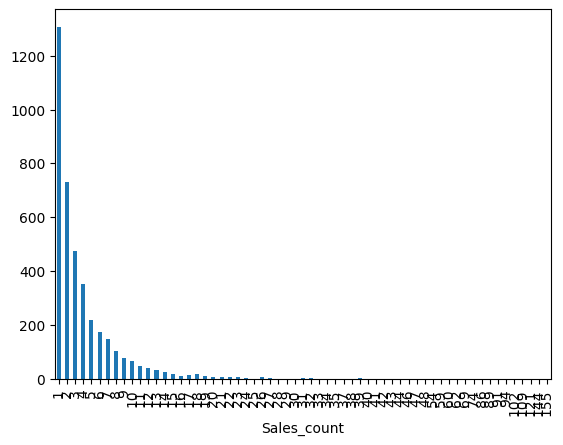

In [339]:
summary_df.groupby('Sales_count').count()['Sales_avg'].plot(kind='bar')

In [340]:
orders_df.head(10)

Sales         InvoiceDate
Customer ID Invoice                           
12346.0     491725   45.00 2009-12-14 08:34:00
            491742   22.50 2009-12-14 11:00:00
            491744   22.50 2009-12-14 11:02:00
            492718   22.50 2009-12-18 10:47:00
            492722    1.00 2009-12-18 10:55:00
            493410   22.50 2010-01-04 09:24:00
            493412   22.50 2010-01-04 09:53:00
            494450   22.50 2010-01-14 13:50:00
            495295   22.50 2010-01-22 13:30:00
            499763   27.05 2010-03-02 13:08:00

In [341]:
data_df = orders_df.groupby(['Customer ID', pd.Grouper(key='InvoiceDate', freq='3M')]).agg({'Sales': [sum, groupby_mean, groupby_count]})

In [342]:
data_df.head(1)

Sales            
                           sum   avg count
Customer ID InvoiceDate                   
12346.0     2009-12-31   113.5  22.7     5

In [343]:
data_df.isna().sum()

Sales  sum      0
       avg      0
       count    0
dtype: int64

In [344]:
data_df.shape

(8751, 3)

In [345]:
data_df.columns = ['sales_sum', 'sales_avg', 'sales_count']


In [346]:
data_df = data_df.reset_index()

data_df.head(1)

,Customer ID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2009-12-31,113.5,22.7,5


In [347]:
data_df.loc [data_df['sales_sum'] > 0]

,Customer ID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2009-12-31,113.50,22.70,5
1,12346.0,2010-03-31,117.05,23.41,5
2,12346.0,2010-06-30,142.31,142.31,1
3,12608.0,2010-12-31,415.79,415.79,1
4,12745.0,2010-06-30,456.92,456.92,1
...,...,...,...,...,...
8746,18286.0,2009-12-31,462.95,462.95,1
8747,18286.0,2010-09-30,833.48,833.48,1
8748,18287.0,2010-06-30,1071.61,1071.61,1
8749,18287.0,2010-09-30,892.60,446.30,2


In [348]:
str( sorted(data_df['InvoiceDate'].unique(), reverse=True)[0] )[:10]

'2010-12-31'

In [349]:
# Generate M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

data_df['M'].unique()

array(['M_5', 'M_4', 'M_3', 'M_1', 'M_2'], dtype=object)

In [2]:
#{str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

In [351]:
#nt={str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

#data_df['InvoiceDate'].apply(lambda x: nt[str(x)[:10]])

## M column stands/represents the 3-months intervals.

In [352]:
data_df.head(2)

,Customer ID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2009-12-31,113.50,22.70,5,M_5
1,12346.0,2010-03-31,117.05,23.41,5,M_4


In [353]:
data_df.shape

(8751, 6)

In [354]:
data_df['Customer ID'].nunique()

3971

## Predicting the 3 month Customer Lifetime Value

## Create summary statistics in 3 month intervals for customer sales

## RFM
## By definition, RFM represents:

### R(ecency): how recently did customer purchase?

### F(rquency): how often do customer purchase?

### M(onetary Value): how much do they spend (each time on average)?

### Creating our features dataframe


In [355]:

#features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='Customer ID')

#features_df.columns = ['_'.join(col) for col in features_df.columns]

#features_df.head()

In [356]:
# del features_df

In [357]:
features_df = pd.pivot_table(data_df, values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='Customer ID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
Customer ID,,,,,,,,,,,,,,,
12346.0,NaN,NaN,142.310,23.410000,22.7,NaN,NaN,1.0,5.0,5.0,NaN,NaN,142.31,117.05,113.5
12608.0,415.790,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,415.79,NaN,NaN,NaN,NaN
12745.0,NaN,266.93,456.920,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,266.93,456.92,NaN,NaN
12746.0,NaN,NaN,254.550,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,254.55,NaN,NaN
12747.0,450.265,314.84,286.725,156.963333,344.0,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0


In [358]:
#features_df_temp.shape

In [359]:
features_df.shape

(3971, 15)

In [360]:
#features_df_temp.isna().sum()

In [361]:
features_df.isna().sum()

sales_avg_M_1      1584
sales_avg_M_2      2080
sales_avg_M_3      2073
sales_avg_M_4      2300
sales_avg_M_5      3067
sales_count_M_1    1584
sales_count_M_2    2080
sales_count_M_3    2073
sales_count_M_4    2300
sales_count_M_5    3067
sales_sum_M_1      1584
sales_sum_M_2      2080
sales_sum_M_3      2073
sales_sum_M_4      2300
sales_sum_M_5      3067
dtype: int64

In [362]:
#features_df_temp.fillna(0,inplace=True)

In [363]:
features_df.fillna(0,inplace=True)

In [364]:
#features_df_temp.isna().sum()

In [365]:
features_df.isna().sum()

sales_avg_M_1      0
sales_avg_M_2      0
sales_avg_M_3      0
sales_avg_M_4      0
sales_avg_M_5      0
sales_count_M_1    0
sales_count_M_2    0
sales_count_M_3    0
sales_count_M_4    0
sales_count_M_5    0
sales_sum_M_1      0
sales_sum_M_2      0
sales_sum_M_3      0
sales_sum_M_4      0
sales_sum_M_5      0
dtype: int64

In [366]:
#features_df_temp.shape

In [367]:
features_df.shape

(3971, 15)

In [368]:
#features_df_temp

In [369]:
features_df

,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
Customer ID,,,,,,,,,,,,,,,
12346.0,0.000,0.00,142.310,23.410000,22.70,0.0,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.50
12608.0,415.790,0.00,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.00
12745.0,0.000,266.93,456.920,0.000000,0.00,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.00
12746.0,0.000,0.00,254.550,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.00
12747.0,450.265,314.84,286.725,156.963333,344.00,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,97.675,92.00,0.000,118.140000,0.00,2.0,1.0,0.0,3.0,0.0,195.35,92.00,0.00,354.42,0.00
18284.0,461.680,0.00,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,461.68,0.00,0.00,0.00,0.00
18285.0,0.000,0.00,0.000,427.000000,0.00,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,427.00,0.00


In [370]:
features_df.sales_avg_M_2.nunique()

1869

In [371]:
#features_M1=pd.pivot_table(data_df.loc[data_df['M'] != 'M_2'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='Customer ID')

In [372]:
#features_M1.head()

In [373]:
#features_M1.shape

In [374]:
#features_M1.columns = ['_'.join(col) for col in features_M1.columns]

#features_M1.head()

In [375]:
#features_M1=features_M1[["sales_avg_M_1","sales_count_M_1","sales_sum_M_1"]]

In [376]:
#features_M1.reset_index(inplace=True)


In [377]:
#features_M1.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

In [378]:
#features_M1.head()

In [379]:
#features_M1.set_index('CustomerID',inplace=True)

In [380]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer ID  8751 non-null   float64       
 1   InvoiceDate  8751 non-null   datetime64[ns]
 2   sales_sum    8751 non-null   float64       
 3   sales_avg    8751 non-null   float64       
 4   sales_count  8751 non-null   int64         
 5   M            8751 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 410.3+ KB


In [381]:
data_df.M.value_counts()

M
M_1    2387
M_3    1898
M_2    1891
M_4    1671
M_5     904
Name: count, dtype: int64

In [382]:
features_df = features_df.fillna(0)

In [383]:
features_df.reset_index(inplace=True)
features_df.head(2)

,Customer ID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,0.00,0.0,142.31,23.41,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.0,142.31,117.05,113.5
1,12608.0,415.79,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.0,0.00,0.00,0.0


In [384]:
features_df.head(2)

,Customer ID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,0.00,0.0,142.31,23.41,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.0,142.31,117.05,113.5
1,12608.0,415.79,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.0,0.00,0.00,0.0


## Creating our response dataframe. This will server as the target variable for Regression. 

##  Instead of taking First Month sales sum of each customer, we will take sales average of each customer. Reason being, 
##    not every customer has shopped in first month. So the sales_sum value for them would be zero. 
    
##    There are 1639(out of 3971) customer who haven't shopped in first month. This is almost 40% of the total values in target variable. 
##    This may lead to improper Regression fit/score/performance. 
    
##    So, we will use column 'Sales_avg' from dataframe summary_df
    


In [385]:
#response_df = data_df.loc[data_df['M'] == 'M_1', ['Customer ID', 'sales_sum']]

#response_df.columns = ['CustomerID', 'CLV_3M']
#response_df.head()

In [386]:
#features_df.reset_index(inplace=True)

In [387]:
#features_df.set_index('Customer ID', inplace=True)

In [388]:
#features_df.head(2)

In [389]:
#features_df=features_df.drop('index',axis=1)
#features_df=features_df.drop('level_0',axis=1)

In [390]:
features_df_copy=features_df

In [391]:
#features_df_copy.reset_index(inplace=True)


### USE BELOW CODE/CELL TO DROP INDEX & LEVEL COLUMNS IN feattures_df_copy

In [392]:


#features_df_copy=features_df_copy.drop('index',axis=1)
#features_df_copy=features_df_copy.drop('level_0',axis=1)

In [393]:
features_df_copy.head()

,Customer ID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,0.000,0.00,142.310,23.410000,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.5
1,12608.0,415.790,0.00,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.0
2,12745.0,0.000,266.93,456.920,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.0
3,12746.0,0.000,0.00,254.550,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.0
4,12747.0,450.265,314.84,286.725,156.963333,344.0,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0


In [394]:
features_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      3971 non-null   float64
 1   sales_avg_M_1    3971 non-null   float64
 2   sales_avg_M_2    3971 non-null   float64
 3   sales_avg_M_3    3971 non-null   float64
 4   sales_avg_M_4    3971 non-null   float64
 5   sales_avg_M_5    3971 non-null   float64
 6   sales_count_M_1  3971 non-null   float64
 7   sales_count_M_2  3971 non-null   float64
 8   sales_count_M_3  3971 non-null   float64
 9   sales_count_M_4  3971 non-null   float64
 10  sales_count_M_5  3971 non-null   float64
 11  sales_sum_M_1    3971 non-null   float64
 12  sales_sum_M_2    3971 non-null   float64
 13  sales_sum_M_3    3971 non-null   float64
 14  sales_sum_M_4    3971 non-null   float64
 15  sales_sum_M_5    3971 non-null   float64
dtypes: float64(16)
memory usage: 496.5 KB


In [395]:
response_df=summary_df[['Customer ID', 'Sales_avg']]

response_df.head()
response_df.columns = ['CustomerID', 'CLV_LR']
response_df.head()
#features_df_copy.head()
#features_df_copy.drop('index',axis=1)
#features_df_copy.drop('level_0',axis=1)

,CustomerID,CLV_LR
0,12346.0,33.896364
1,12608.0,415.790000
2,12745.0,361.925000
3,12746.0,254.550000
4,12747.0,317.533125


In [396]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Customer ID                     3971 non-null   float64       
 1   Sales_min                       3971 non-null   float64       
 2   Sales_max                       3971 non-null   float64       
 3   Sales_sum                       3971 non-null   float64       
 4   Sales_avg                       3971 non-null   float64       
 5   Sales_median                    3971 non-null   float64       
 6   Sales_count                     3971 non-null   int64         
 7   InvoiceDate_min                 3971 non-null   datetime64[ns]
 8   InvoiceDate_max                 3971 non-null   datetime64[ns]
 9   InvoiceDate_purchase_duration   3971 non-null   int64         
 10  InvoiceDate_purchase_frequency  3971 non-null   int64         
dtypes: d

In [397]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3971 non-null   float64
 1   CLV_LR      3971 non-null   float64
dtypes: float64(2)
memory usage: 62.2 KB


In [398]:
response_df.isna().sum()

CustomerID    0
CLV_LR        0
dtype: int64

In [399]:
response_df.shape

(3971, 2)

In [400]:
features_df.to_csv('features_df.csv', index=True)

In [401]:
response_df.to_csv('response_df.csv',index=True)

In [402]:
response_df.head()

,CustomerID,CLV_LR
0,12346.0,33.896364
1,12608.0,415.790000
2,12745.0,361.925000
3,12746.0,254.550000
4,12747.0,317.533125


In [403]:
response_df.nunique()

CustomerID    3971
CLV_LR        3910
dtype: int64

In [404]:
features_df.head()

,Customer ID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
0,12346.0,0.000,0.00,142.310,23.410000,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.5
1,12608.0,415.790,0.00,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.0
2,12745.0,0.000,266.93,456.920,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.0
3,12746.0,0.000,0.00,254.550,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.0
4,12747.0,450.265,314.84,286.725,156.963333,344.0,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0


In [405]:
features_df=features_df.rename(columns={'Customer ID':'CustomerID'})


In [406]:
features_df.shape

(3971, 16)

In [407]:
response_df.shape

(3971, 2)

In [408]:
# Create our final dataset (ready for use by models) by merging features with response

In [409]:
#sample_set_df = features_df.merge(
    #response_df, how='left', on='CustomerID')

In [410]:
# below code will not give NaN in CLV_3M
# Merge the features and response dataframes on 'CustomerID'
sample_set_df = pd.merge(features_df, response_df, on='CustomerID', how='outer')

# Display the head of the merged dataframe to confirm the merge
sample_set_head = sample_set_df.head()
sample_set_head

,CustomerID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_LR
0,12346.0,0.000,0.00,142.310,23.410000,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.5,33.896364
1,12608.0,415.790,0.00,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.0,415.790000
2,12745.0,0.000,266.93,456.920,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.0,361.925000
3,12746.0,0.000,0.00,254.550,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.0,254.550000
4,12747.0,450.265,314.84,286.725,156.963333,344.0,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0,317.533125


In [473]:
sample_set_df.to_csv('sample_set_df.csv')

In [411]:
#del sample_set_df

In [412]:
sample_set_df.head(5)

,CustomerID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_LR
0,12346.0,0.000,0.00,142.310,23.410000,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.5,33.896364
1,12608.0,415.790,0.00,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.0,415.790000
2,12745.0,0.000,266.93,456.920,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.0,361.925000
3,12746.0,0.000,0.00,254.550,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.0,254.550000
4,12747.0,450.265,314.84,286.725,156.963333,344.0,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0,317.533125


In [413]:
sample_set_df.CLV_LR.isna().sum()

0

In [414]:
sample_set_df.shape

(3971, 17)

In [415]:
sample_set_df.loc [sample_set_df['CLV_LR']==0]

,CustomerID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_LR
923,14103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,14827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [416]:
sample_set_df.count()

CustomerID         3971
sales_avg_M_1      3971
sales_avg_M_2      3971
sales_avg_M_3      3971
sales_avg_M_4      3971
sales_avg_M_5      3971
sales_count_M_1    3971
sales_count_M_2    3971
sales_count_M_3    3971
sales_count_M_4    3971
sales_count_M_5    3971
sales_sum_M_1      3971
sales_sum_M_2      3971
sales_sum_M_3      3971
sales_sum_M_4      3971
sales_sum_M_5      3971
CLV_LR             3971
dtype: int64

In [417]:
sample_set_df.head()

,CustomerID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_LR
0,12346.0,0.000,0.00,142.310,23.410000,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.5,33.896364
1,12608.0,415.790,0.00,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.0,415.790000
2,12745.0,0.000,266.93,456.920,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.0,361.925000
3,12746.0,0.000,0.00,254.550,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.0,254.550000
4,12747.0,450.265,314.84,286.725,156.963333,344.0,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0,317.533125


In [418]:
sample_set_df.isna().sum()

CustomerID         0
sales_avg_M_1      0
sales_avg_M_2      0
sales_avg_M_3      0
sales_avg_M_4      0
sales_avg_M_5      0
sales_count_M_1    0
sales_count_M_2    0
sales_count_M_3    0
sales_count_M_4    0
sales_count_M_5    0
sales_sum_M_1      0
sales_sum_M_2      0
sales_sum_M_3      0
sales_sum_M_4      0
sales_sum_M_5      0
CLV_LR             0
dtype: int64

In [419]:
# sample_set_df = sample_set_df.fillna(0)

### Import packages for Linear Regression

In [420]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [421]:
#Set the target variable (CLV_3M) and feature variables (everything except customer id)

In [422]:
summary_df.head()

,Customer ID,Sales_min,Sales_max,Sales_sum,Sales_avg,Sales_median,Sales_count,InvoiceDate_min,InvoiceDate_max,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
0,12346.0,1.00,142.31,372.86,33.896364,22.500,11,2009-12-14 08:34:00,2010-06-28 13:53:00,196,11
1,12608.0,415.79,415.79,415.79,415.790000,415.790,1,2010-10-31 10:49:00,2010-10-31 10:49:00,0,1
2,12745.0,266.93,456.92,723.85,361.925000,361.925,2,2010-05-14 16:50:00,2010-08-10 10:14:00,87,2
3,12746.0,254.55,254.55,254.55,254.550000,254.550,1,2010-06-17 10:41:00,2010-06-17 10:41:00,0,1
4,12747.0,89.32,715.10,5080.53,317.533125,315.290,16,2009-12-07 13:23:00,2010-12-05 15:38:00,363,16


In [423]:
for_reg=summary_df

In [424]:
for_reg.reset_index(inplace=True)

In [425]:
for_reg=for_reg.drop('InvoiceDate_min', axis=1)
for_reg=for_reg.drop('InvoiceDate_max', axis=1)



In [426]:
for_reg.rename(columns={'InvoiceDate_purchase_duration': 'recency', 'InvoiceDate_purchase_frequency': 'frequency'}, inplace=True)
for_reg.rename(columns={'Sales_median': 'CLV_LR'}, inplace=True)
 #   all_data.rename(columns={'CLV_3M': 'Recency_quantiles'}, inplace=True)

In [427]:
for_reg.head()

,index,Customer ID,Sales_min,Sales_max,Sales_sum,Sales_avg,CLV_LR,Sales_count,recency,frequency
0,0,12346.0,1.00,142.31,372.86,33.896364,22.500,11,196,11
1,1,12608.0,415.79,415.79,415.79,415.790000,415.790,1,0,1
2,2,12745.0,266.93,456.92,723.85,361.925000,361.925,2,87,2
3,3,12746.0,254.55,254.55,254.55,254.550000,254.550,1,0,1
4,4,12747.0,89.32,715.10,5080.53,317.533125,315.290,16,363,16


In [428]:
target_var = 'CLV_LR'

all_features = [col for col in for_reg.columns if col not in ['Customer ID', 'CLV_LR'] ]

In [429]:
all_features

['index',
 'Sales_min',
 'Sales_max',
 'Sales_sum',
 'Sales_avg',
 'Sales_count',
 'recency',
 'frequency']

In [430]:
len(all_features)

8

In [431]:
# Split dataset into train and test sets

In [432]:
x_train, x_test, y_train, y_test = train_test_split(for_reg[all_features], for_reg[target_var], test_size=0.3,  random_state=11)

In [433]:
#Training features shape: (1207 12)
#Testing features shape: (518 12)
#Training target shape: (1207 )
#Testing target shape: (518 )
#The dataset has been split into training and testing sets with the training set containing 1207 samples and the testing set containing 518 samples, each with 12 features. The target variable has been split accordingly.

In [434]:
# Fit a Linear Regression model to predict the response using the available features

In [435]:
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [436]:
# Obtain the estimate for the y-intercept of regression model

In [437]:
reg_fit.intercept_

5.870799597552093

In [438]:
reg_fit.coef_

array([-8.91926905e-04, -1.87757411e-02, -1.56023091e-01,  5.30651609e-03,
        1.16747310e+00, -1.92461475e-01,  3.74788772e-02, -1.92461475e-01])

In [439]:
# Pass our input datasets (train and test) through our model predictors

In [440]:
reg_fit.predict(x_train)

array([ 98.0875303 , 310.12395088, 409.54758599, ..., 346.26899898,
       206.81688099, 175.14079626])

In [441]:
reg_fit.predict(x_test)

array([178.31743255, 192.72942455, 102.72838892, ..., 438.95257827,
       365.64288066, 285.02776841])

In [442]:
# Assess performance of model on training data

In [443]:
from sklearn.metrics import r2_score, median_absolute_error

In [444]:
r2_score(y_true=y_train, y_pred=reg_fit.predict(x_train))

0.9724645150050457

In [445]:
# Compare 𝑅2 performance on training and test datasets

In [446]:
r2_score(y_true=y_test, y_pred=reg_fit.predict(x_test))

0.9851174472489891

In [447]:
# Compare  𝑀𝑆𝐸  performance on training and test datasets

In [448]:
median_absolute_error(y_true=y_test, y_pred=reg_fit.predict(x_test))

5.8994532907441055

In [449]:
# Visualize the predicted vs actual values using test dataset

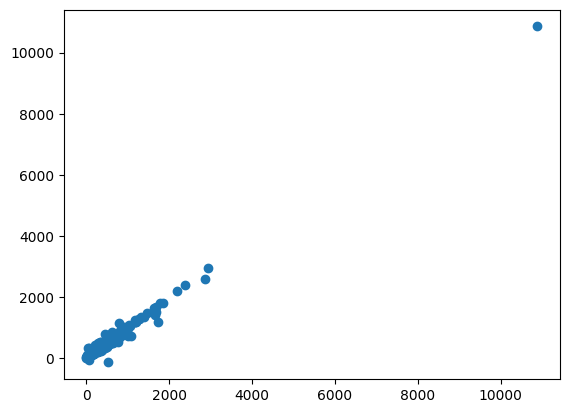

In [450]:
plt.scatter( y_test, reg_fit.predict(x_test) ) 

In [451]:
# The scatter plot above displays the actual vs. predicted values for the test set. 
#Each point represents an observation from the test set, with the actual value on the x-axis and the predicted value on the y-axis. 
#A perfect prediction would result in all points lying on a line with a 45-degree slope, 
#indicating that the predicted values are equal to the actual values.

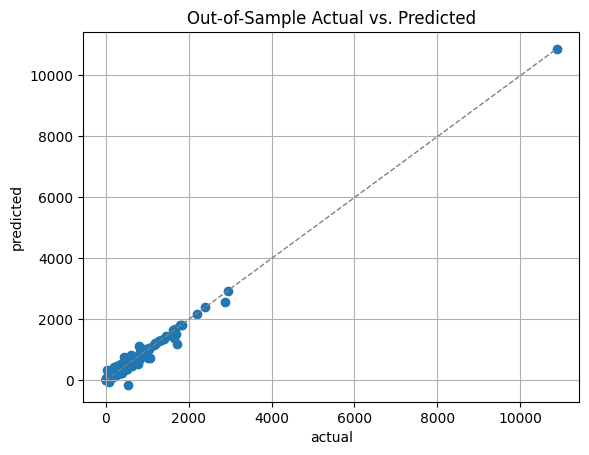

In [452]:
test_preds = reg_fit.predict(x_test)

plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

In [453]:
import pandas as pd

# Assuming 'CustomerID' is in the original dataframe 'sample_set_df'
# and we want to predict 'CLV_3M' for all customers.
# We will use the entire dataset (excluding the actual 'CLV_3M' values) to predict the 'CLV_3M'.

# Prepare the features for prediction
features_for_prediction = for_reg[all_features]

# Predict the 'CLV_3M' using the fitted model
predicted_CLV_3M = reg_fit.predict(features_for_prediction)

# Create a dataframe with 'CustomerID' and the predicted 'CLV_3M'
predictions_df = pd.DataFrame({'Customer ID': for_reg['Customer ID'], 'Predicted_CLV_LR': predicted_CLV_3M})

# Display the first 5 rows of the dataframe
predictions_df.head()

,Customer ID,Predicted_CLV_LR
0,12346.0,28.311766
1,12608.0,420.435415
2,12745.0,358.436776
3,12746.0,259.519209
4,12747.0,297.735431


In [454]:
for_reg.head()

,index,Customer ID,Sales_min,Sales_max,Sales_sum,Sales_avg,CLV_LR,Sales_count,recency,frequency
0,0,12346.0,1.00,142.31,372.86,33.896364,22.500,11,196,11
1,1,12608.0,415.79,415.79,415.79,415.790000,415.790,1,0,1
2,2,12745.0,266.93,456.92,723.85,361.925000,361.925,2,87,2
3,3,12746.0,254.55,254.55,254.55,254.550000,254.550,1,0,1
4,4,12747.0,89.32,715.10,5080.53,317.533125,315.290,16,363,16


In [455]:
predictions_df.to_csv('LR_predictions.csv')

In [456]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       3971 non-null   float64
 1   Predicted_CLV_LR  3971 non-null   float64
dtypes: float64(2)
memory usage: 62.2 KB


In [457]:
# Merge the predicted CLV_3M dataframe with the original dataframe
merged_df = for_reg.merge(predictions_df, on='Customer ID', how='left')
merged_df.head()

,index,Customer ID,Sales_min,Sales_max,Sales_sum,Sales_avg,CLV_LR,Sales_count,recency,frequency,Predicted_CLV_LR
0,0,12346.0,1.00,142.31,372.86,33.896364,22.500,11,196,11,28.311766
1,1,12608.0,415.79,415.79,415.79,415.790000,415.790,1,0,1,420.435415
2,2,12745.0,266.93,456.92,723.85,361.925000,361.925,2,87,2,358.436776
3,3,12746.0,254.55,254.55,254.55,254.550000,254.550,1,0,1,259.519209
4,4,12747.0,89.32,715.10,5080.53,317.533125,315.290,16,363,16,297.735431


In [458]:
#merged_df.to_csv('merged_df.csv')
#merged_df=sample_set_df

In [459]:
sample_set_df.head()

,CustomerID,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_LR
0,12346.0,0.000,0.00,142.310,23.410000,22.7,0.0,0.0,1.0,5.0,5.0,0.00,0.00,142.31,117.05,113.5,33.896364
1,12608.0,415.790,0.00,0.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,415.79,0.00,0.00,0.00,0.0,415.790000
2,12745.0,0.000,266.93,456.920,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.00,266.93,456.92,0.00,0.0,361.925000
3,12746.0,0.000,0.00,254.550,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,254.55,0.00,0.0,254.550000
4,12747.0,450.265,314.84,286.725,156.963333,344.0,4.0,2.0,4.0,3.0,3.0,1801.06,629.68,1146.90,470.89,1032.0,317.533125


In [460]:
summary_only_RF_df.head()

,InvoiceDate_purchase_duration,InvoiceDate_purchase_frequency
0,196,11
1,0,1
2,87,2
3,0,1
4,363,16


In [461]:
sample_set_df.shape

(3971, 17)

In [462]:
#summary_only_RF_df.info()

In [463]:
#summary_only_RF_df=summary_only_RF_df.drop(["index"], axis=1)

In [464]:
#summary_only_RF_df.info()

In [465]:
#summary_only_RF_df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

In [466]:
#summary_only_RF_df.reset_index(inplace=True)

In [467]:
#summary_only_RF_df.head()

In [468]:
#features_df.info()

In [469]:
# Correcting the merge operation using the right column names
#all_data = sample_set_df.merge(summary_only_RF_df, on='CustomerID', how='inner')

# Setting 'Customer ID' as the index
#merged_df.set_index('CustomerID', inplace=True)

# Display the head of the merged dataframe
#all_data.head()

In [470]:
#summary_only_RF_df.info()

In [471]:
# Renaming the columns 'InvoiceDate_purchase_duration' and 'InvoiceDate_purchase_frequency'
#all_data.rename(columns={'InvoiceDate_purchase_duration': 'Recency_quantiles',   'InvoiceDate_purchase_frequency': 'Frequency_quantiles'}, inplace=True)

#all_data.rename(columns={'CLV_3M': 'Recency_quantiles'}, inplace=True)

# Display the head of the dataframe to confirm the renaming
#all_data.head()

In [472]:
#all_data.head()